In [ ]:
!pip install tensorflow keras scikit-learn numpy matplotlib

In [ ]:
from keras.datasets import imdb # type: ignore
(train_data, train_labels),(test_data,test_labels) = imdb.load_data(num_words= 10000)

In [ ]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [ ]:
train_labels[0]

np.int64(1)

In [ ]:
print(type([max(sequence) for sequence in train_data]))
max([max(sequence) for sequence in train_data])

<class 'list'>


9999

In [ ]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [ ]:
len(reverse_word_index)

88584

In [ ]:
import numpy as np # type: ignore
def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences),dimension))
    for i,sequence in enumerate(sequences):
        results[i,sequence] = 1
    return results

xtrain = vectorize_sequences(train_data)
xtest = vectorize_sequences(test_data)

In [ ]:
xtrain[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
xtrain.shape

(25000, 10000)

In [ ]:
ytrain = np.asarray(train_labels).astype('float32')
ytest = np.asarray(test_labels).astype('float32')

In [ ]:
from keras import models # type: ignore
from keras import layers # type: ignore

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
from keras import optimizers # type: ignore
from keras import losses # type: ignore
from keras import metrics # type: ignore

model.compile(optimizer= optimizers.RMSprop(learning_rate= 0.001),
              loss = losses.binary_crossentropy,
              metrics= [metrics.binary_accuracy])

In [ ]:
xval = xtrain[:10000]
partial_xtrain = xtrain[10000:]

yval = ytrain[:10000]
partial_ytrain = ytrain[10000:]

In [ ]:
history = model.fit(partial_xtrain,
                    partial_ytrain,
                    epochs=20,
                    batch_size= 512,
                    validation_data=(xval, yval))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - binary_accuracy: 0.6770 - loss: 0.6401 - val_binary_accuracy: 0.8581 - val_loss: 0.4770
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - binary_accuracy: 0.8730 - loss: 0.4317 - val_binary_accuracy: 0.8743 - val_loss: 0.3697
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - binary_accuracy: 0.9045 - loss: 0.3159 - val_binary_accuracy: 0.8850 - val_loss: 0.3153
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - binary_accuracy: 0.9221 - loss: 0.2535 - val_binary_accuracy: 0.8857 - val_loss: 0.2925
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - binary_accuracy: 0.9368 - loss: 0.2074 - val_binary_accuracy: 0.8893 - val_loss: 0.2773
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - binary_accuracy: 0.9450 - loss: 0.1742 - val_binary_accuracy: 0.8898 - val_loss: 0.2765
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - binary_accuracy: 0.9523 - loss: 0.1572 - val_binary_accuracy: 0.8888 - val_loss: 0.2782
Epoch 8/20
30

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['binary_accuracy', 'loss', 'val_binary_accuracy', 'val_loss'])

In [ ]:
import matplotlib.pyplot as plt # type: ignore
%matplotlib inline

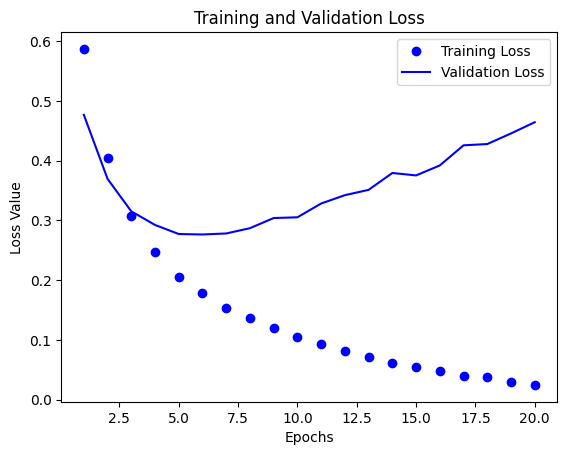

In [ ]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values)+1)

plt.plot(epochs, loss_values, 'bo', label = "Training Loss")
plt.plot(epochs, val_loss_values, 'b', label = "Validation Loss")

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

plt.show()

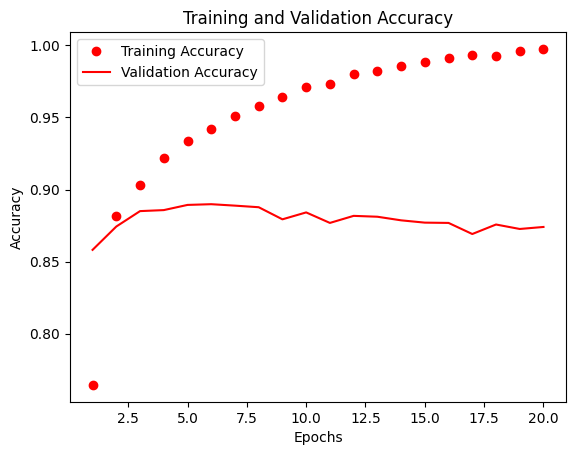

In [ ]:
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

epochs = range(1, len(loss_values)+1)

plt.plot(epochs, acc_values, 'ro', label = "Training Accuracy")
plt.plot(epochs, val_acc_values, 'r', label = "Validation Accuracy")

plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:

model.fit(partial_xtrain,
          partial_ytrain,
          epochs= 3,
          batch_size= 512,
          validation_data=(xval,yval))

Epoch 1/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - binary_accuracy: 0.9980 - loss: 0.0204 - val_binary_accuracy: 0.8728 - val_loss: 0.4856
Epoch 2/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - binary_accuracy: 0.9990 - loss: 0.0167 - val_binary_accuracy: 0.8714 - val_loss: 0.5355
Epoch 3/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - binary_accuracy: 0.9991 - loss: 0.0144 - val_binary_accuracy: 0.8719 - val_loss: 0.5270


In [ ]:
np.set_printoptions(suppress= True)
result = model.predict(xtest)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [ ]:
result

array([[0.01766147],
       [1.        ],
       [0.916057  ],
       ...,
       [0.00589581],
       [0.00921519],
       [0.9624912 ]], dtype=float32)

In [ ]:
test_labels = np.asarray(test_labels).astype('float32')  # Convert to numpy array (if not already done)

# Calculate MAE between true labels and model predictions
mae = mean_absolute_error(test_labels, y_pred)
print("Mean Absolute Error (True vs Predicted):", mae)

Mean Absolute Error (True vs Predicted): 0.14528


In [ ]:
y_pred = np.zeros(len(result))
for i, score in enumerate(result):
    y_pred[i] = 1 if score > 0.5 else 0

# Calculate accuracy
accuracy = np.mean(y_pred == test_labels)  # Fraction of correct predictions
print("Model Accuracy:", accuracy)

Model Accuracy: 0.85988
